**Лабораторная работа № 7:** Линейная регрессия <br>
**Выполнил:** Стадников Александр, гр. 6135

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.simplefilter(action='ignore')

---
## 0.0. Найти и загрузить датасет, подгодящий для регрессии
---

**Resource:** https://sites.google.com/site/studentw3/webstudent/2-статистический-анализ-данных-и-текстов?authuser=0

**Данные о новорожденных** 

1. **Sex**      - Пол ребёнка `[male - муж., female  - жен.]`
2. **Gestation** - Продолжительность беременности `[недель]`
3. **Weight**    - Вес новорожденного `[грамм]`
4. **Length**    - Рост новорожденного `[сантиметров]`
5. **Head**     - Размер головы `[сантиметров]` ***- целевая***
6. **Chest**    - Размер грудной клетки `[сантиметров]`
7. **Mother.s.age** - Возраст матери `[лет]`
8. **type**    - Тип места жительства `[r - сельская, u - городская]`
9. **region**   - Район рождения `[bz, rc]`

**Источник:**
Wang, B. and Wertelecki, W. (2012) Density Estimation for Data With Rounding Errors, Computational Statistics and Data Analysis, doi: 10.1016/j.csda.2012.02.016

`[The R Package: bstats -> Dataset: birth]`

In [2]:
birth = pd.read_csv(r'02-birth.txt', sep='\s+', skiprows=[13], header=13) # sep='\s+' - один и более пробелов
birth.head(200)

,Sex,Gestation,Weight,Length,Head,Chest,Mother.s.age,type,region
1,female,40,2800,50.0,31.0,30.0,25,r,bz
2,female,38,3250,50.0,36.0,35.3,24,r,bz
3,male,39,3100,50.0,33.0,34.0,17,r,bz
4,male,40,4000,53.0,35.0,36.0,41,r,bz
5,male,40,3800,52.0,34.0,35.0,43,r,bz
...,...,...,...,...,...,...,...,...,...
196,female,40,3800,54.0,34.0,33.0,26,r,bz
197,male,38,3000,49.0,33.0,33.0,29,r,bz
198,female,40,3200,52.0,34.0,35.0,21,r,bz
199,male,40,2600,48.0,34.0,33.0,25,r,bz


In [3]:
100 * birth.isna().sum() / birth.shape[0] #поиск пустых значений

Sex             0.0
Gestation       0.0
Weight          0.0
Length          0.0
Head            0.0
Chest           0.0
Mother.s.age    0.0
type            0.0
region          0.0
dtype: float64

## 0.1. Временно удалить категориальные / бинарные признаки, оставив только вещественные

In [4]:
numeric_columns = birth.select_dtypes(include='number').columns
birth_without_categorical = birth[numeric_columns]
birth_without_categorical.head(3)

,Gestation,Weight,Length,Head,Chest,Mother.s.age
1,40,2800,50.0,31.0,30.0,25
2,38,3250,50.0,36.0,35.3,24
3,39,3100,50.0,33.0,34.0,17


## 0.5. Визуализировать heatmap-матрицу кореллированности признаков

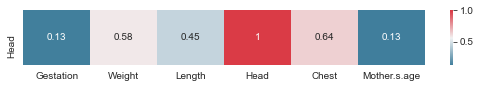

In [5]:
corr = birth_without_categorical.corr(method='spearman')
f, ax = plt.subplots(figsize=(9, 1))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
sns.heatmap(corr.sort_values(by=['Head'], ascending=False).head(1), cmap=cmap, annot = True)
plt.show()

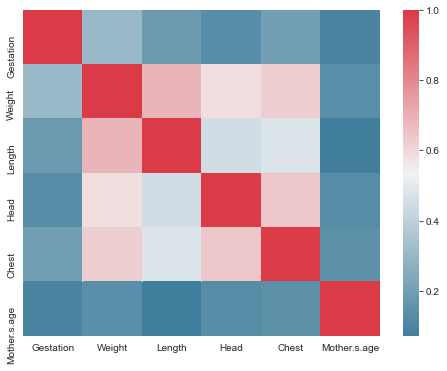

In [6]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(corr, cmap=cmap)
plt.show()

---
**Отсортированные признаки по убыванию значения корреляции:**

In [7]:
top_corr = corr['Head'].sort_values(ascending=False).head(10).to_frame()
table_corr = top_corr.style.background_gradient(cmap=cmap)
table_corr

,Head
Head,1.000000
Chest,0.644196
Weight,0.584641
Length,0.452871
Gestation,0.131716
Mother.s.age,0.127424


## 0.6. Визуализировать взаимосвязь между target-переменной и каждым из признаком

(с помощью srs.pairplot или pandas.plotting.scatter_matrix или как-то ещё). Лучше всего, если будете строить диаграмму попарного распределения не между ВСЕМИ парами признаков, а только между признаками и целевой переменной

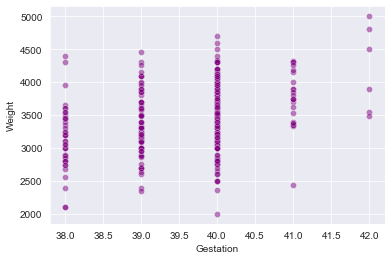

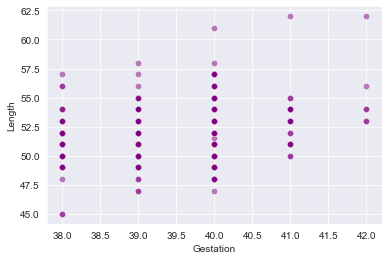

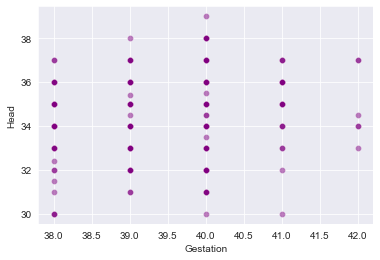

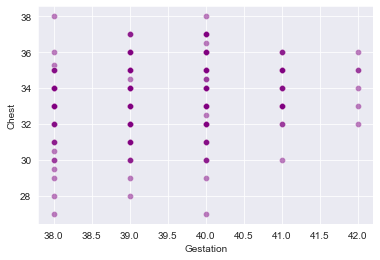

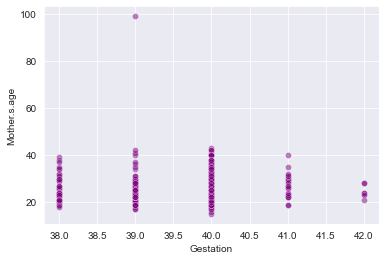

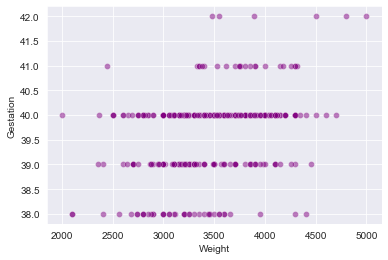

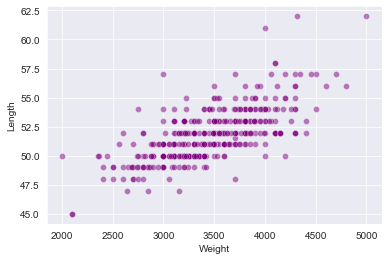

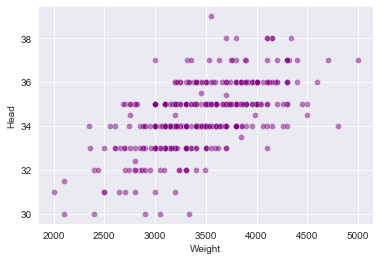

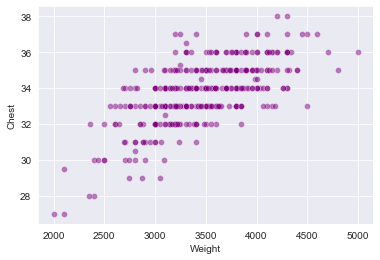

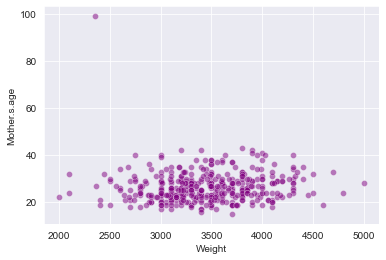

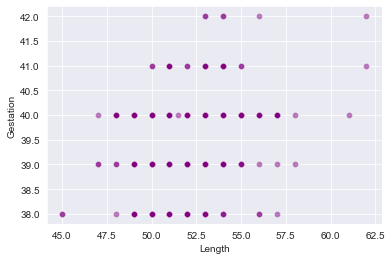

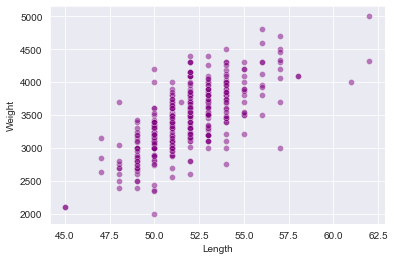

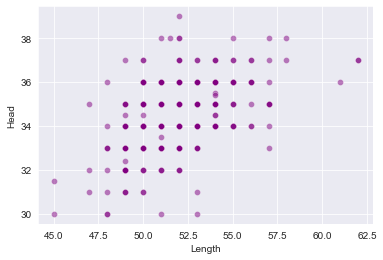

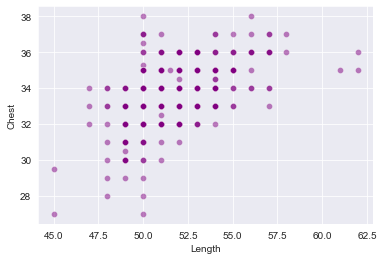

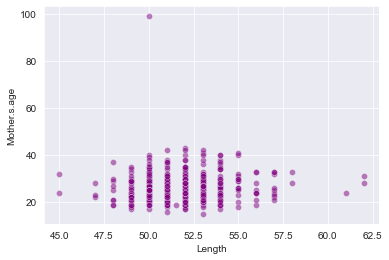

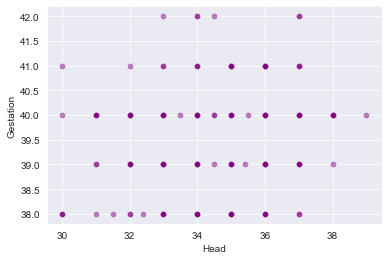

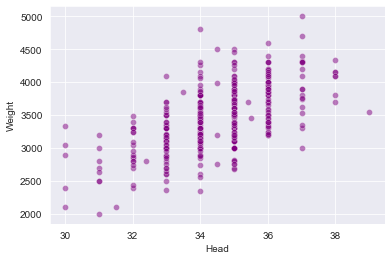

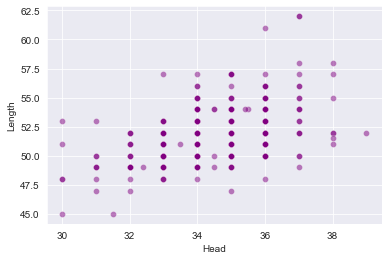

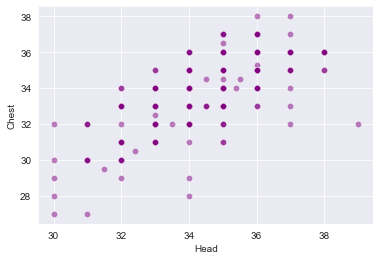

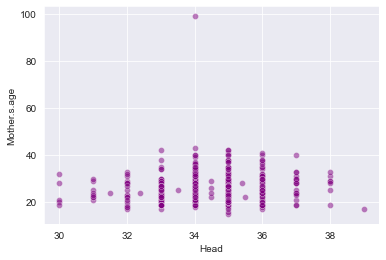

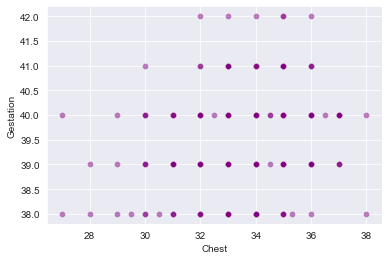

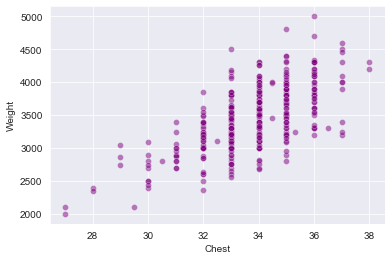

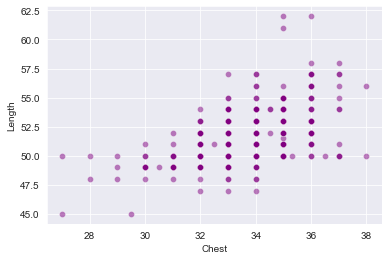

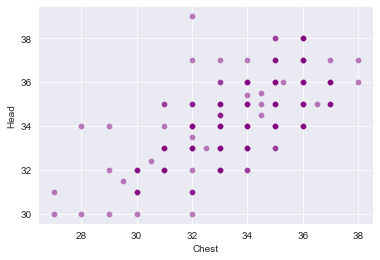

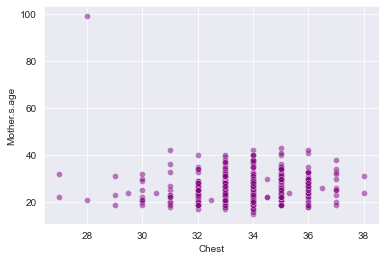

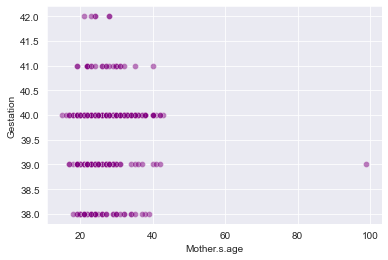

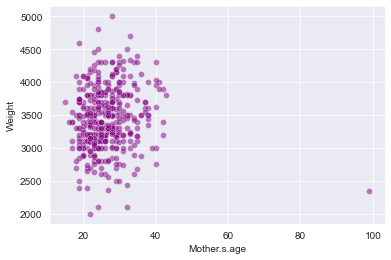

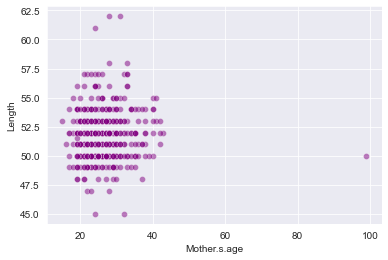

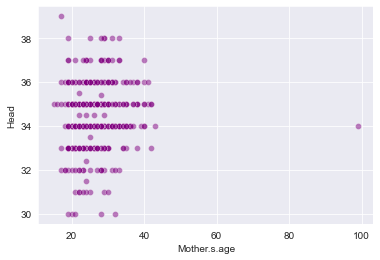

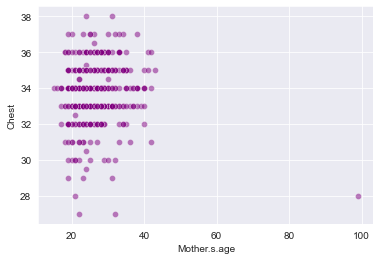

In [8]:
for feature_first in birth_without_categorical.columns.to_list():
  for feature_second in birth_without_categorical.columns.to_list():
    if feature_first != feature_second:
      sns.scatterplot(x = birth_without_categorical[feature_first],
                      y = birth_without_categorical[feature_second],
                      alpha=0.5,
                      color='purple',
                      palette="rocket")
      plt.show()

In [9]:
y = birth_without_categorical["Head"]
X = birth_without_categorical.drop("Head", axis=1)
X.columns

Index(['Gestation', 'Weight', 'Length', 'Chest', 'Mother.s.age'], dtype='object')

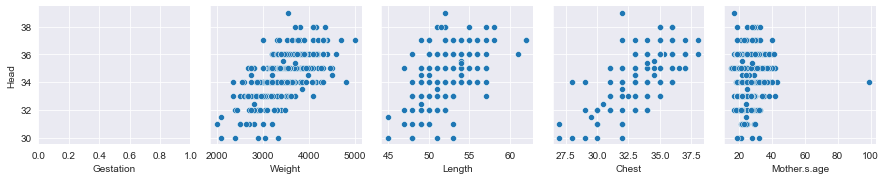

In [10]:
sns.pairplot(data = birth_without_categorical,
             y_vars = ['Head'],
             x_vars = X.columns,
             height=2.5
            )

## 0.8. Разделить на обучающую и тестовую выборки

In [11]:
import sklearn.model_selection

In [12]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, random_state = 0
)

-----
---
# 1. Linear regression
----
---

## 1.1 Обучить модель линейной регрессии (LinearRegression)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
regression = LinearRegression().fit(X_train, y_train)
print(f'Коэффициенты регрессии: {regression.coef_}\nСвободный член: {regression.intercept_}')

Коэффициенты регрессии: [-0.12640474  0.00080829  0.04621818  0.42046243  0.01919163]
Свободный член: 19.575429582452546


## 1.2 Вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [16]:
def get_estimations(true_values, predictions):
  mae = mean_absolute_error(true_values, predictions)
  mse =  mean_squared_error(true_values, predictions)
  determ_coef = r2_score(true_values, predictions)
  return mae, mse, determ_coef

In [17]:
print('------------- Тренировочная выборка -------------')
print(f'MAE, MSE, R^2: {get_estimations(y_train, regression.predict(X_train))}')
print('------------- Тестовая выборка -------------')
print(f'MAE, MSE, R^2: {get_estimations(y_test, regression.predict(X_test))}')

------------- Тренировочная выборка -------------
MAE, MSE, R^2: (0.8020177452362861, 1.070212090521744, 0.5226552190704368)
------------- Тестовая выборка -------------
MAE, MSE, R^2: (0.798022267793732, 1.1147688783336855, 0.42278086842439033)


## 1.3 Вывести model.coef_ и model.intercept_

In [18]:
print(f'Коэффициенты регрессии: {regression.coef_}\nСвободный член: {regression.intercept_}')

Коэффициенты регрессии: [-0.12640474  0.00080829  0.04621818  0.42046243  0.01919163]
Свободный член: 19.575429582452546


In [19]:
feature_names = X_train.columns.to_list()

coefs = pd.DataFrame(
    regression.coef_,
    columns=['Coefficients'], index=feature_names
)

coefs = coefs.sort_values(by='Coefficients')
coefs

,Coefficients
Gestation,-0.126405
Weight,0.000808
Mother.s.age,0.019192
Length,0.046218
Chest,0.420462


## 1.4. Построить график (barh) с важностью коэфициентов при соответствующих признаках 
- строится точно так же как мы строили графики для feature_importance в теме с деревьями)
- желательно если сверху вниз будут идти коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси

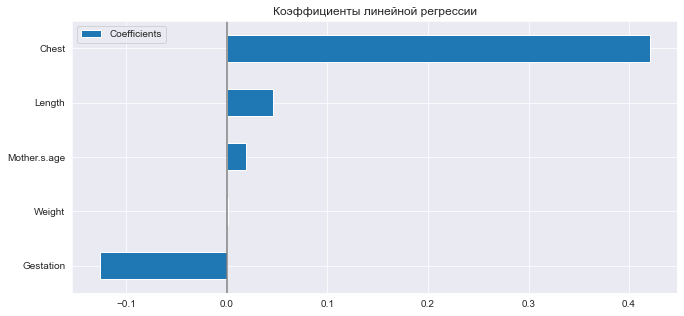

In [20]:
coefs.plot(kind='barh', figsize=(14,  5))
plt.title('Коэффициенты линейной регрессии')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

----
----
# 2. Lasso regression
----
----

## 2.1. Обучить модель регрессии (Lasso), с помощью GridSearchCV найти наилучший параметр alpha, дальше работаем с лучше моделью

In [21]:
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [22]:
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
GridSearchCV(linear_model.Lasso(random_state=42), param_grid=lasso_params).fit(X_train, y_train).best_estimator_,

(Lasso(alpha=0.02, random_state=42),)

In [23]:
lasso_regression = linear_model.Lasso(alpha=0.02, random_state=42).fit(X_train, y_train)

## 2.2. Для наилучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

In [24]:
print('------------- Тренировочная выборка -------------')
print(f'MAE, MSE, R^2: {get_estimations(y_train, lasso_regression.predict(X_train))}')
print('------------- Тестовая выборка -------------')
print(f'MAE, MSE, R^2: {get_estimations(y_test, lasso_regression.predict(X_test))}')

------------- Тренировочная выборка -------------
MAE, MSE, R^2: (0.803616699874429, 1.0713235105099606, 0.5221594944047424)
------------- Тестовая выборка -------------
MAE, MSE, R^2: (0.7964614171678093, 1.1139146366290904, 0.42322318850029617)


## 2.3. Для наилучшей модели вывести model.coef_ и model.intercept_

In [25]:
print(f'Коэффициенты регрессии: {lasso_regression.coef_} \nСвободный член: {lasso_regression.intercept_}')

Коэффициенты регрессии: [-0.08976535  0.00083543  0.03929698  0.40894014  0.01867716] 
Свободный член: 18.78974369618721


In [26]:
feature_names = X_train.columns.to_list()

coefs = pd.DataFrame(
    lasso_regression.coef_,
    columns=['Coefficients'], index=feature_names
)

coefs = coefs.sort_values(by='Coefficients')
coefs

,Coefficients
Gestation,-0.089765
Weight,0.000835
Mother.s.age,0.018677
Length,0.039297
Chest,0.408940


## 2.4. Для наилучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

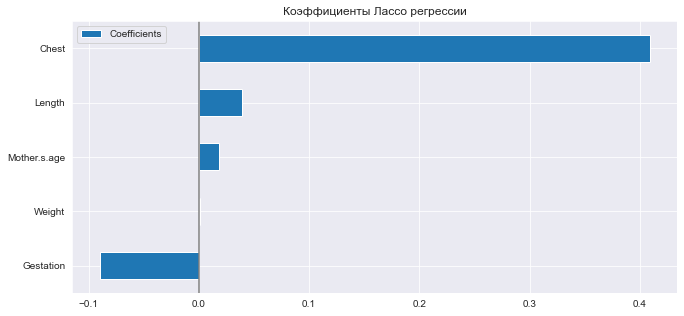

In [27]:
coefs.plot(kind='barh', figsize=(14,  5))
plt.title('Коэффициенты Лассо регрессии')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

----
----
# 3. Ridge regression
-----
----

## 3.1. Обучить модель регрессии (Ridge), с помощью GridSearchCV найти наилучший параметр alpha, дальше работаем с лучше моделью

In [28]:
from sklearn.linear_model import Ridge

In [29]:
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}
GridSearchCV(Ridge(random_state=42), param_grid=ridge_params).fit(X_train, y_train).best_estimator_,

(Ridge(alpha=200, random_state=42),)

In [30]:
ridge_regression = Ridge(alpha=200, random_state=42).fit(X_train, y_train)

## 3.2. Для наилучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

In [31]:
print('------------- Тренировочная выборка -------------')
print(f'MAE, MSE, R^2: {get_estimations(y_train, ridge_regression.predict(X_train))}')
print('------------- Тестовая выборка -------------')
print(f'MAE, MSE, R^2: {get_estimations(y_test, ridge_regression.predict(X_test))}')

------------- Тренировочная выборка -------------
MAE, MSE, R^2: (0.8149279713793518, 1.09724945098787, 0.5105957936323213)
------------- Тестовая выборка -------------
MAE, MSE, R^2: (0.7952901504213776, 1.1388848317060463, 0.41029380502204693)


## 3.3. Для наилучшей модели вывести model.coef_ и model.intercept_

In [32]:
print(f'Коэффициенты регрессии: {ridge_regression.coef_}, Свободный член: {ridge_regression.intercept_}')

Коэффициенты регрессии: [-0.05700041  0.00106596  0.04383855  0.29804981  0.01860782], Свободный член: 20.19726219074881


In [33]:
feature_names = X_train.columns.to_list()

coefs = pd.DataFrame(
    ridge_regression.coef_,
    columns=['Coefficients'], index=feature_names
)

coefs = coefs.sort_values(by='Coefficients')
coefs

,Coefficients
Gestation,-0.057000
Weight,0.001066
Mother.s.age,0.018608
Length,0.043839
Chest,0.298050


## 3.4. Для наилучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

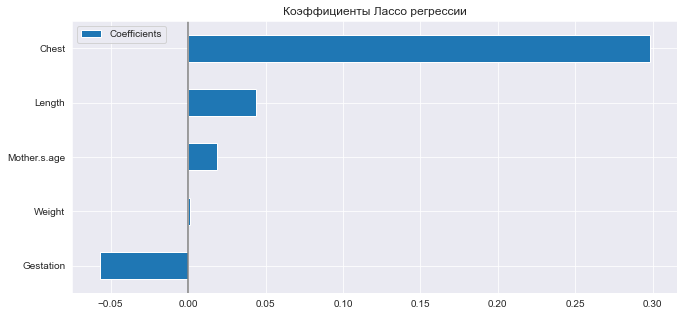

In [34]:
coefs.plot(kind='barh', figsize=(14,  5))
plt.title('Коэффициенты Лассо регрессии')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

---
---
# 4. ElasticNet regression
---
---

## 4.1. Обучить модель регрессии (ElasticNet), с помощью GridSearchCV найти наилучший параметры alpha и l1_ratio (в пределах 0:1), дальше работаем с лучше моделью

In [35]:
from sklearn.linear_model import ElasticNet

In [36]:
elastic_net_params = {"alpha": [0.0001, 0.001, 0.01, 0.1],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1)
                     }
GridSearchCV(ElasticNet(random_state=42), param_grid=elastic_net_params).fit(X_train, y_train).best_estimator_,

(ElasticNet(alpha=0.1, l1_ratio=0.0, random_state=42),)

In [37]:
elastic_net_regression = ElasticNet(alpha=0.1, l1_ratio=0.0, random_state=42).fit(X_train, y_train)

## 4.2. Для наилучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

In [38]:
print('------------- Тренировочная выборка -------------')
print(f'MAE, MSE, R^2: {get_estimations(y_train, elastic_net_regression.predict(X_train))}')
print('------------- Тестовая выборка -------------')
print(f'MAE, MSE, R^2: {get_estimations(y_test, elastic_net_regression.predict(X_test))}')

------------- Тренировочная выборка -------------
MAE, MSE, R^2: (0.8033803243934581, 1.0713890936864918, 0.5221302424580384)
------------- Тестовая выборка -------------
MAE, MSE, R^2: (0.7958901441970749, 1.1151831219954949, 0.422566376101024)


## 4.3. Для наилучшей модели вывести model.coef_ и model.intercept_

In [39]:
print(f'Коэффициенты регрессии: {elastic_net_regression.coef_}, Свободный член: {elastic_net_regression.intercept_}')

Коэффициенты регрессии: [-0.10698403  0.00085509  0.04611972  0.3960047   0.01906306], Свободный член: 19.47642594281826


In [40]:
feature_names = X_train.columns.to_list()

coefs = pd.DataFrame(
    elastic_net_regression.coef_,
    columns=['Coefficients'], index=feature_names
)

coefs = coefs.sort_values(by='Coefficients')
coefs

,Coefficients
Gestation,-0.106984
Weight,0.000855
Mother.s.age,0.019063
Length,0.046120
Chest,0.396005


## 4.4. Для наилучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

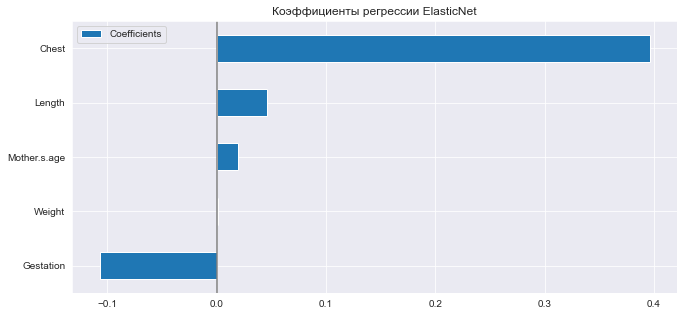

In [41]:
coefs.plot(kind='barh', figsize=(14,  5))
plt.title('Коэффициенты регрессии ElasticNet')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

---
---
# 5. Сравнение моделей, выбор лучшей
---
---

## 5.0. Выбрать наилучшую модель, написать её ошибку MAE, MSE и R2 на тестовом наборе

**Linear:** 
MAE, MSE, R^2: (`0.798022267793732`, `1.1147688783336855`, `0.42278086842439033`) <br>
**Lasso:** 
MAE, MSE, R^2: (`0.7964614171678093`, `1.1139146366290904`, `0.42322318850029617`) <br>
**Ridge:** 
MAE, MSE, R^2: (`0.7952901504213776`, `1.1388848317060463`, `0.41029380502204693`) <br>
**Elastic NET:** 
MAE, MSE, R^2: (`0.7958901441970749`, `1.1151831219954949`, `0.422566376101024`)<br>

**Лучшая по МАЕ:**
> Ridge

**Лучшая по МSЕ:**
> Lasso

**Лучшая по R^2:**
> Ridge

## 5.1. Возвращаем категориальные / бинарные признаки на место в датасет, категориальные признаки преобразуем в набор бинарных через pd.get_dummies( ..., drop_first = True )

In [42]:
df = birth
df.head(3)

,Sex,Gestation,Weight,Length,Head,Chest,Mother.s.age,type,region
1,female,40,2800,50.0,31.0,30.0,25,r,bz
2,female,38,3250,50.0,36.0,35.3,24,r,bz
3,male,39,3100,50.0,33.0,34.0,17,r,bz


In [43]:
df = pd.concat([df,pd.get_dummies(df['Sex'],drop_first = True)],axis = 1)
df = pd.concat([df,pd.get_dummies(df['type'],drop_first = True)],axis = 1)
df = pd.concat([df,pd.get_dummies(df['region'],drop_first = True)],axis = 1)
df = df.drop(columns=['Sex','type','region'])
df.head(3)

,Gestation,Weight,Length,Head,Chest,Mother.s.age,male,u,rc
1,40,2800,50.0,31.0,30.0,25,0,0,0
2,38,3250,50.0,36.0,35.3,24,0,0,0
3,39,3100,50.0,33.0,34.0,17,1,0,0


## 5.2. Смотрим насколько изменились метрики MAE и MSE на тестовом наборе, отображаем их

In [44]:
y1 = df["Head"]
X1 = df.drop("Head", axis=1)

In [45]:
X_train1, X_test1, y_train1, y_test1 = sklearn.model_selection.train_test_split(
    X1, y1, random_state = 0
)

In [46]:
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}
GridSearchCV(Ridge(random_state=42), param_grid=ridge_params).fit(X_train1, y_train1).best_estimator_,

(Ridge(alpha=200, random_state=42),)

In [47]:
ridge_regression1 = Ridge(alpha=200, random_state=42).fit(X_train1, y_train1)

In [48]:
print('------------- Тренировочная выборка -------------')
print(f'MAE, MSE, R^2: {get_estimations(y_train1, ridge_regression1.predict(X_train1))}')
print('------------- Тестовая выборка -------------')
print(f'MAE, MSE, R^2: {get_estimations(y_test1, ridge_regression1.predict(X_test1))}')

------------- Тренировочная выборка -------------
MAE, MSE, R^2: (0.7845908196090473, 1.0361863310851482, 0.5378316675782326)
------------- Тестовая выборка -------------
MAE, MSE, R^2: (0.7988955631432291, 1.137170208955756, 0.4111816240795556)


---
> По сравнению с предыдущими значениями качество **ухудшилось**

## 5.3. Прогоняем наш датасет (X), который уже обогащён бинарными признаками, через StandardScaler, обучаем найденную на предыдущих шагах лучшую модель новыми данными, пишем получивнуюся ошибку MAE, MSE и R2 на тестовом наборе

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()

In [51]:
data_tr = df.drop("Head",axis = 1)
target = df["Head"]

In [52]:
scaler.fit(data_tr) #нормируем данные
tdtr = scaler.transform(data_tr)

In [53]:
X_train2, X_test2, y_train2, y_test2 = sklearn.model_selection.train_test_split(
    tdtr, target, random_state = 0
)

In [54]:
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}
GridSearchCV(Ridge(random_state=42), param_grid=ridge_params).fit(X_train2, y_train2).best_estimator_,

(Ridge(alpha=200, random_state=42),)

In [55]:
ridge_regression2 = Ridge(alpha=200, random_state=42).fit(X_train2, y_train2)

In [56]:
print('------------- Тренировочная выборка -------------')
print(f'MAE, MSE, R^2: {get_estimations(y_train2, ridge_regression2.predict(X_train2))}')
print('------------- Тестовая выборка -------------')
print(f'MAE, MSE, R^2: {get_estimations(y_test2, ridge_regression2.predict(X_test2))}')

------------- Тренировочная выборка -------------
MAE, MSE, R^2: (0.7836546201447476, 1.0688496591527192, 0.5232629018925039)
------------- Тестовая выборка -------------
MAE, MSE, R^2: (0.8272254055973681, 1.1811101618538395, 0.3884298394305111)


---
> По сравнению с предыдущими значениями качество **для MAE, MSE - ухудшилось, для R^2 - улучшилось**

## 5.4. Выводим итоговый набор графика с коэффициентами, (желательно если сверху вниз будут идти коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).

In [57]:
feature_names = X_train1.columns.to_list()

coefs = pd.DataFrame(
    ridge_regression2.coef_,
    columns=['Coefficients'], index=feature_names
)

coefs = coefs.sort_values(by='Coefficients')
coefs

,Coefficients
Gestation,0.002714
Mother.s.age,0.070436
u,0.091644
rc,0.091644
male,0.131584
Length,0.163270
Weight,0.280240
Chest,0.448450


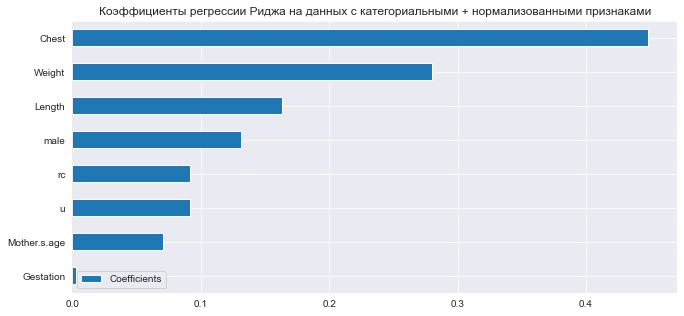

In [58]:
coefs.plot(kind='barh', figsize=(14,  5))
plt.title('Коэффициенты регрессии Риджа на данных с категориальными + нормализованными признаками')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)